# **Customer Churn Prediction using Machine Learning**


## **Problem Statement**
Customer churn is a critical challenge in many industries, affecting revenue and business growth. This project aims to develop a **Machine Learning model** to predict customer churn, enabling businesses to take proactive measures.


## **Objective**
The goal of this project is to build an accurate and scalable churn prediction model that:  
1. **Maximizes recall** to identify potential churners effectively.  
2. **Maintains precision** to minimize false positives.  
3. **Ensures scalability** for real-world applications.  

## **Dataset Overview**
- **Source**: [Kaggle IBM Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
- **Features**: Customer demographics, contract type, payment method, tenure, monthly charges, total charges, and service subscriptions.  
- **Target**: `Churn` (Yes for churned, No for retained customers).  
- **Imbalance**: Churn cases account for a small percentage of the dataset, requiring handling techniques like resampling or weighted models.  


## **Tools and Technologies**
- **Programming Language**: Python  
- **Libraries**: Pandas, NumPy, Scikit-learn, XGBoost, Matplotlib, Seaborn  
- **Environment**: Google Colab  

### Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
path="/content/drive/MyDrive/Colab_Notebooks/Telco-Customer-Churn.csv"
df=pd.read_csv(path)
print("Total number of instances in the dataset is: ",df.shape[0])
print("Number of features in the dataset is: ",df.shape[1])
df.sample(5)

Total number of instances in the dataset is:  7043
Number of features in the dataset is:  21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5052,3255-GRXMG,Male,0,No,Yes,18,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),45.65,747.2,No
6977,2843-CQMEG,Male,0,No,No,24,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.70,1218.25,No
2013,7328-OWMOM,Female,0,No,Yes,31,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,589.25,No
3759,7479-NITWS,Male,0,No,No,7,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.35,631.85,Yes
5382,6229-UOLQL,Male,0,Yes,Yes,56,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,52.00,2884.9,No


In [4]:
df.drop('customerID',axis=1,inplace=True)   #dropping the customer ID because it is useless in building ML model and axis=1 tell column and inplace=Trure means our datafrane will be updated
df.dtypes  #this attribute show the datatypes of all the columns

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [5]:
df.TotalCharges.values  #this shows that our total charges feature is a string array and we want to convert this into numbers

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce' ).isnull()  #coerce argument is to set the parsing invalidities i.e having blank space in between will be set as NaN pd.to_numeric will return pd series

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [7]:
#we can supply the above function as the index to our dataframe and it will return the rows with missing values by creating a new dataframe
df[pd.to_numeric(df.TotalCharges,errors='coerce' ).isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#these are only 11 rows (instances) out of our total of more than 7k instances so keeping thiings simple we can just drop these and move on
df1=df[df.TotalCharges!=' '] #store all of the indexes of our df into a new df where TotalCharges is not blank
df1.shape

(7032, 20)

In [9]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges,errors='coerce')
df1.TotalCharges.dtypes


<ipython-input-9-42edcbf35ca7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges,errors='coerce')


dtype('float64')

In [10]:
#Now coming towards some visualizations 'tenure' seems to be an interesting feature that tells about the loyalty of a customer
#I want to plot a histogram where x axis is the tenure and y axis is the number of customers leaving having that tenure

(5163,)
(1869,)


Text(0.5, 1.0, 'Customer Churn v/s tenure')

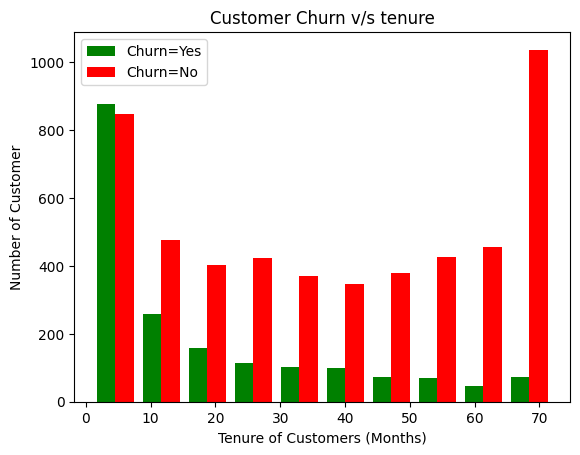

In [11]:
tenure_churn_NO=df1[df1.Churn=='No'].tenure  #.tenure will return a panda series which will be directly accepted by plt.hist as it requires numeric values instead of dataframes
tenure_churn_YES=df1[df1.Churn=='Yes'].tenure
print(tenure_churn_NO.shape)
print(tenure_churn_YES.shape)

plt.hist([tenure_churn_YES,tenure_churn_NO],color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("Tenure of Customers (Months)")
plt.ylabel("Number of Customer")
plt.title("Customer Churn v/s tenure")
##The below plot shows that customers having high tenure are not leaving our business as compared to the new customers so our company can decide upon techniques for new customers retention


(5163,)
(1869,)


Text(0.5, 1.0, 'Customer Churn v/s MonthlyCharges')

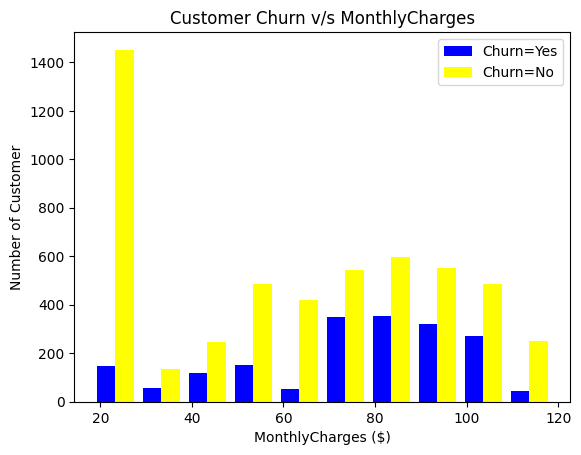

In [12]:

MonthlyCharges_churn_NO=df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_YES=df1[df1.Churn=='Yes'].MonthlyCharges
print(MonthlyCharges_churn_NO.shape)
print(MonthlyCharges_churn_YES.shape)

plt.hist([MonthlyCharges_churn_YES,MonthlyCharges_churn_NO],color=['blue','yellow'], label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("MonthlyCharges ($)")
plt.ylabel("Number of Customer")
plt.title("Customer Churn v/s MonthlyCharges")
##Below chart shows
#More customers who pay low Monthly Charges are leaving (churning).
#Customers who pay higher Monthly Charges tend to stay.
#This means low-paying customers might be more likely to leave the service.

In [13]:
# for column in df:
#   print(f"{column}: {df[column].unique()}")  #here I am trying to see different values present in different means what is the range of values present in each column

def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':      #here I am separating categorical variables to encode them in numbers especifically yes/no columns
      print(f"{column}: {df[column].unique()}")

In [14]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:
#In above mentioned columns I am seeing "No phone service" "NO internet service" which I simply want to replace with "No" because essentially both are same things un-necessarily creating another variable for us to encode

In [16]:
df1.replace("No internet service","No", inplace=True)  #"inplace=True" will modify our df else we have to do something like this df1=df1.replace(''''')
df1.replace("No phone service","No", inplace=True)

<ipython-input-16-8441c401792e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No", inplace=True)  #"inplace=True" will modify our df else we have to do something like this df1=df1.replace(''''')
<ipython-input-16-8441c401792e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No", inplace=True)


In [17]:
print_unique_col_values(df1)   #Now our data frame looks cleaner all of this is part of datacleaning so that we can apply our ML model on it

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
# yes_or_no_columns=[col for col in df1.columns  if df1[col].dtypes=='object' and set(df1[col].unique() == {'Yes', 'No'})]  #I have used set here because order shall not matter as there are columns where we have No as first unique value
# yes_or_no_columns  (previous version)
yes_or_no_columns = [col for col in df1.columns
                     if df1[col].dtype == 'object'
                     and set(df1[col].dropna().unique()) == {"Yes", "No"}]
yes_or_no_columns

#here I have extracted all the columns where the column has "Yes or No" as unique value Now I can do categorical encoding

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [22]:
# for col in yes_or_no_columns:
#   df1.loc[:,col]=df1[col].replace({"Yes":int(1),"No":int(0)})
df1[yes_or_no_columns] = df1[yes_or_no_columns].replace({"Yes": 1, "No": 0})
df1[yes_or_no_columns] = df1[yes_or_no_columns].apply(pd.to_numeric, errors='coerce')

<ipython-input-22-20530e153730>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[yes_or_no_columns] = df1[yes_or_no_columns].replace({"Yes": 1, "No": 0})
<ipython-input-22-20530e153730>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[yes_or_no_columns] = df1[yes_or_no_columns].apply(pd.to_numeric, errors='coerce')


In [23]:
print(df1.columns)
print_unique_col_values(df1)    #here just comparing the columns in dataframe and their corresponding values

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [44]:
#also replacing the gender column
df1.loc[:, 'gender'] = df1['gender'].replace({'Female': 1, "Male": 0}).astype('int64')


In [45]:
df1.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,object
OnlineSecurity,int64
OnlineBackup,int64


In [46]:
#Still there are some columns having text data but they have more than two classes so binary encoding (looselyspeaking not acutally) won't work for these we have to opt for one hot encoding, one hot encoding is basically creating columns for each separate
#choice available in that column for example for InternetService it will create InternetServiceDSL---InternetServiceFiber---InternetServiceNo these three columns and instances having the specific internet service type
#will have one only in that column and rest of two columns will have zero, OHE will increase the dimensionality

In [47]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'],dtype='uint8')
print(df2.shape)   #so  we have increased the number of columns
df2.columns

(7032, 27)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [48]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1290,0,1,1,0,72,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5073,1,0,0,1,22,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
5544,0,0,1,0,59,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [49]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [51]:
cols_to_scale = [col for col in df2.columns if df2[col].max() > 1 or df2[col].min() < 0]
cols_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [55]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [58]:
for col in df2:
  print(f"{col}: {df2[col].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [59]:
#Now Finally my data frame is ready to be fed into my ML model!!!!!!! See so many beautiful numbers :)

In [63]:
X=df2.drop('Churn',axis=1)
y=df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
print(X_test.shape)
print(X_train.shape)

(1407, 26)
(5625, 26)


In [72]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=50)



Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7360 - loss: 0.5200
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7739 - loss: 0.4385
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8132 - loss: 0.4188
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.4206
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8037 - loss: 0.4301
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4284
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.4112
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.4138
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4089
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4035
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4050
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [73]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4481


[0.46268486976623535, 0.7839374542236328]

In [85]:
y_pred=model.predict(X_test)
y_pred[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.0073795 ],
       [0.09712617],
       [0.53750145],
       [0.01430292],
       [0.42912945]], dtype=float32)

In [86]:
y_test[:5]

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0


In [87]:
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'truth')

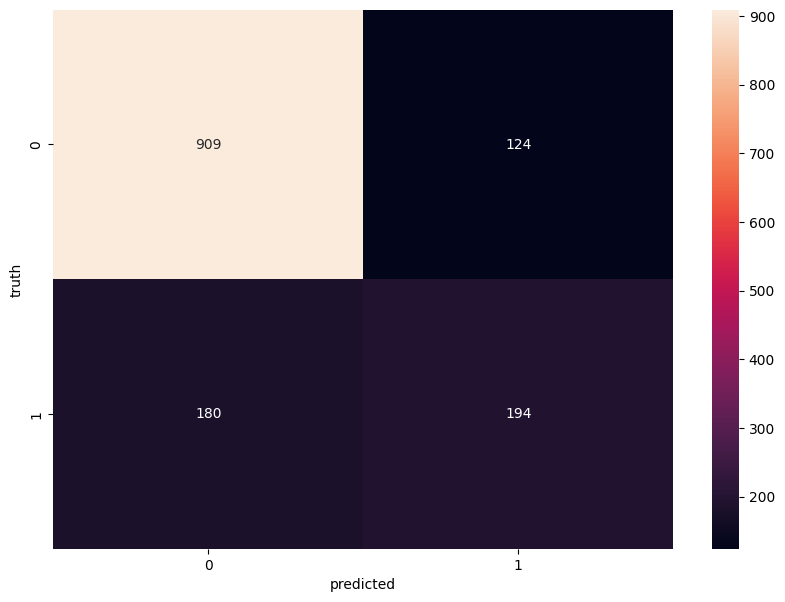

In [92]:
import seaborn as sn
cm=tf.math.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

**Accuracy**

In [95]:
#in confusion matrix anything on main diagonal is correct prediction and off diagonal are the wrong prediction or errors that our model made
#now manually calculating accuracy  Correct predictions/total predictions
round((909+194)/(909+124+180+194),2)  #rounding to 2 decimal places

0.78

***Precision measures how many of the predicted positives were actually correct.***

**Precision 0**

In [97]:
round(909/(909+180),2)

0.83

**Precision 1**

In [98]:
round(194/(124+194),2)

0.61

***Recall measures how many actual positives were correctly identified.***

**Recall 0**

In [99]:
round(909/(909+124),2)

0.88

**Recall 1**

In [101]:
round(194/(194+180),2)

0.52